# Strokes prediction and synthesis

In [1]:
import random
import yaml

from matplotlib import pyplot as plt

from handwriting_synthesis.utils import load_model, plot_stroke
from handwriting_synthesis.modules import StrokesSynthesis, StrokesPrediction

%matplotlib inline

## Loading the trained models

In [2]:
with open("../data/data_params.yaml") as fin:
    data_params = yaml.load(fin)

In [3]:
prediction_model = StrokesPrediction()
synthesis_model = StrokesSynthesis(**data_params)

In [4]:
load_model(prediction_model, "../pretrained_models/prediction.pt", device="cpu")
load_model(synthesis_model, "../pretrained_models/synthesis.pt", device="cpu")

### Unconditional generation:

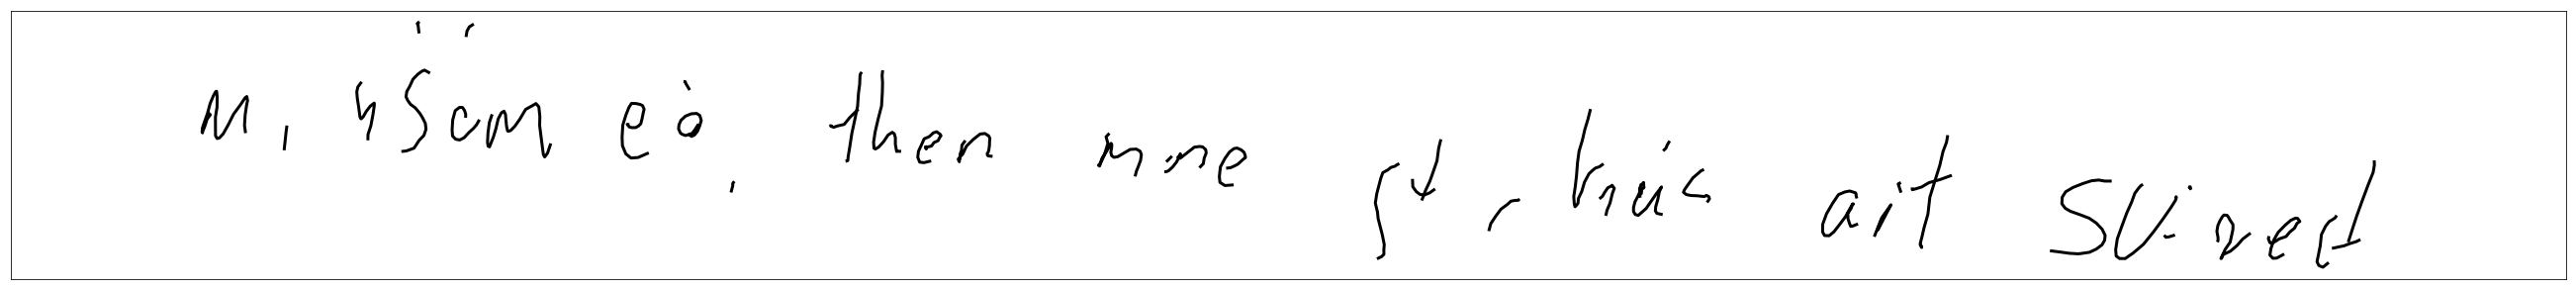

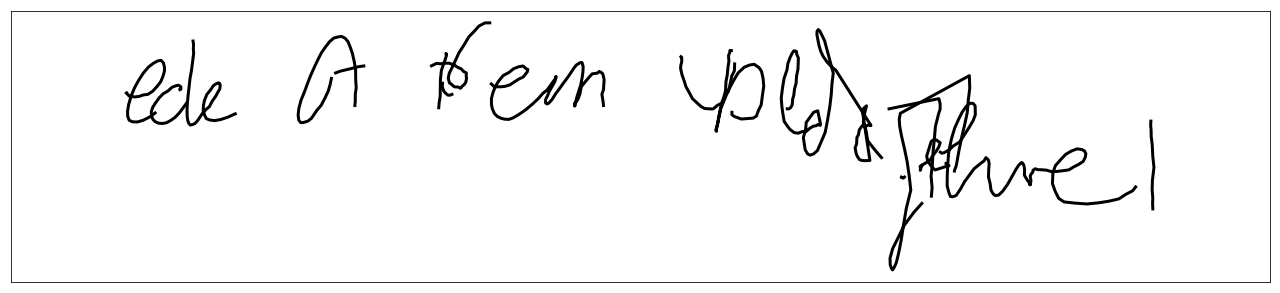

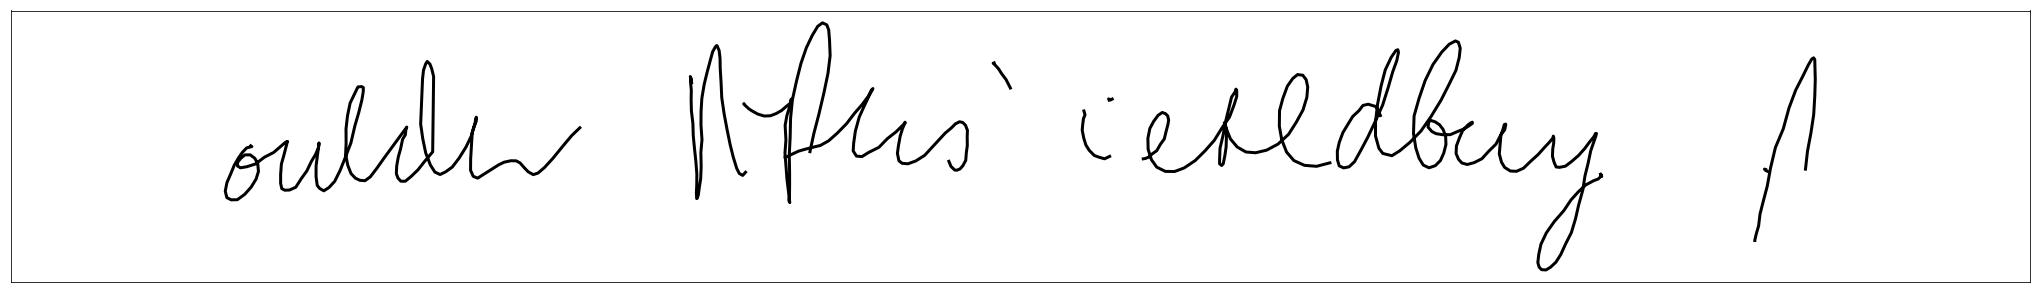

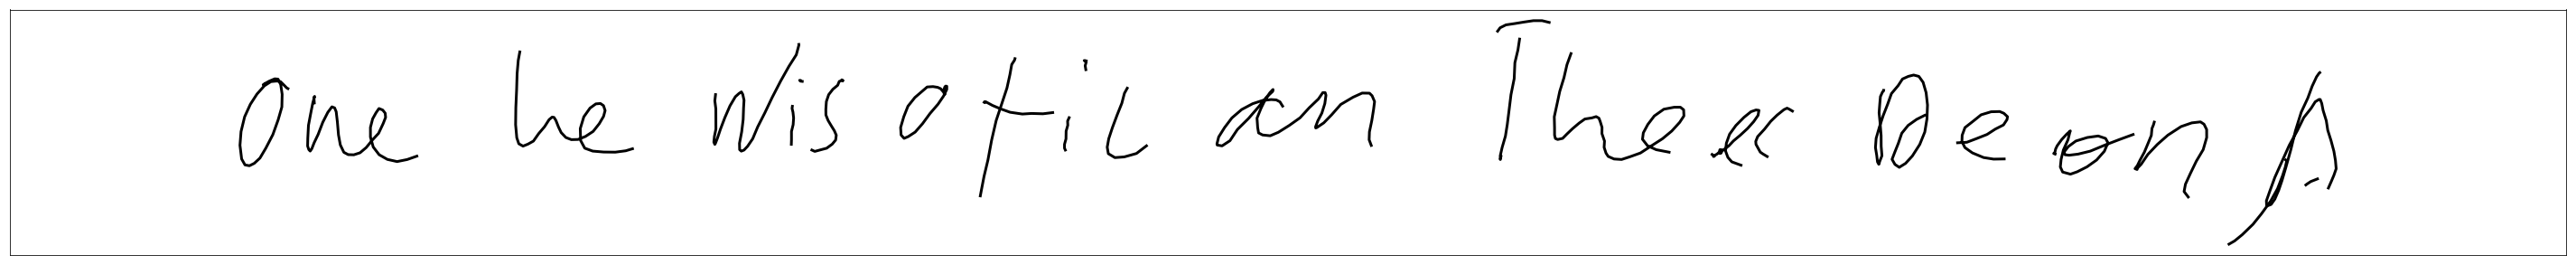

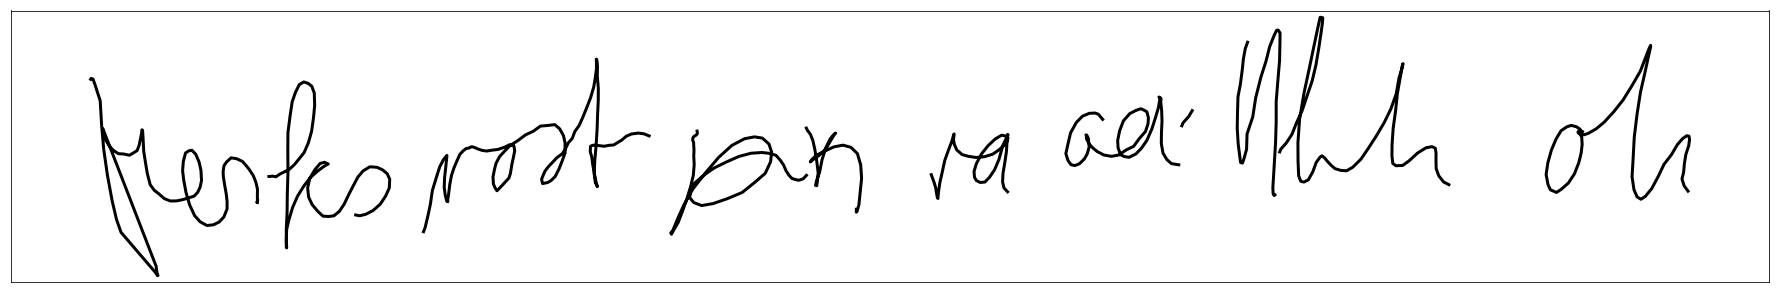

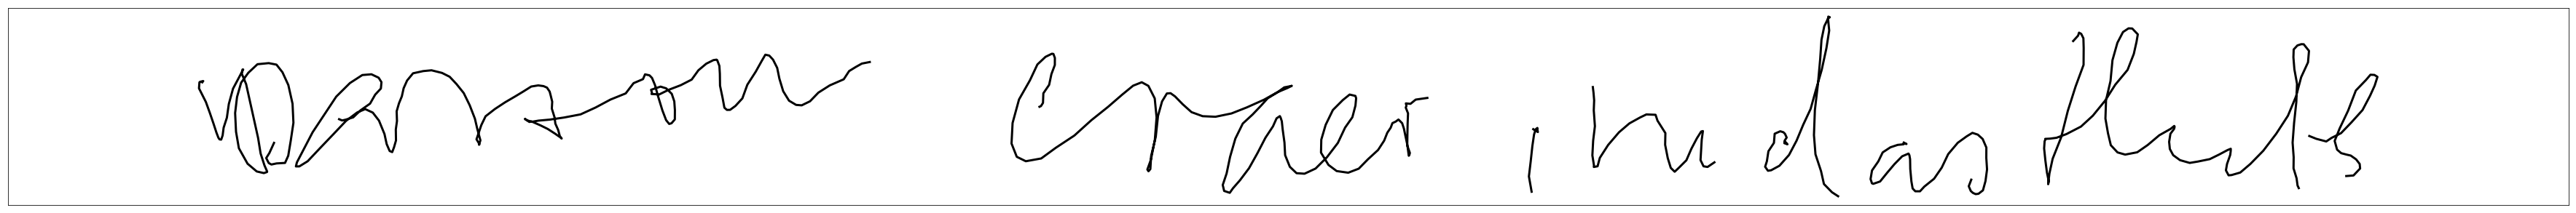

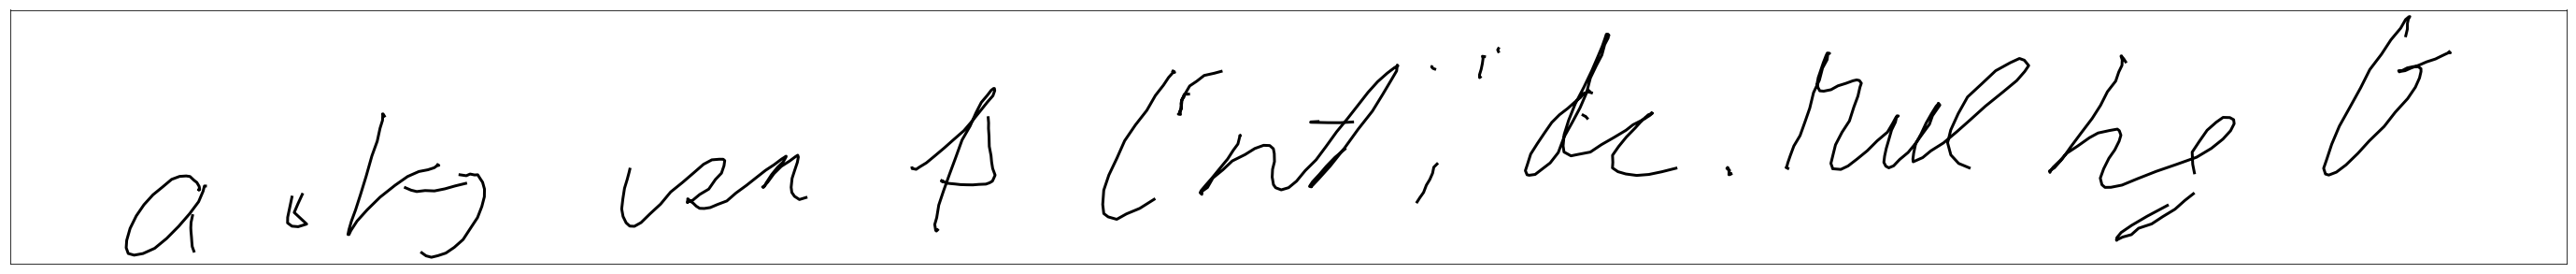

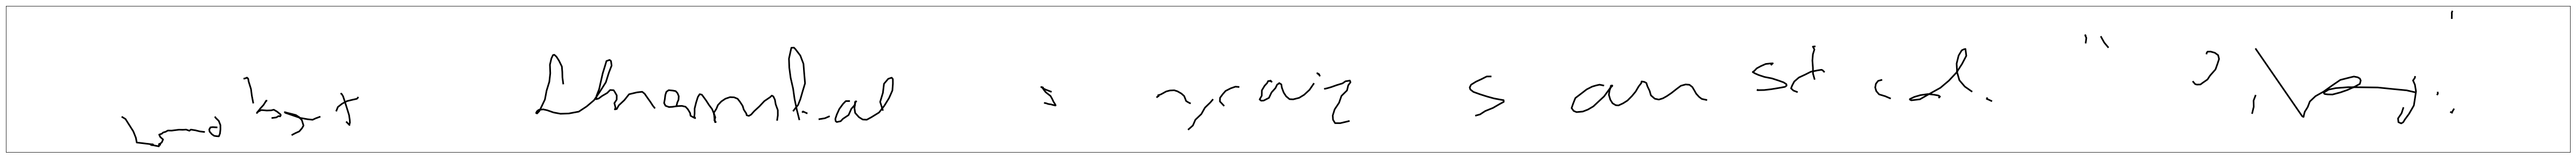

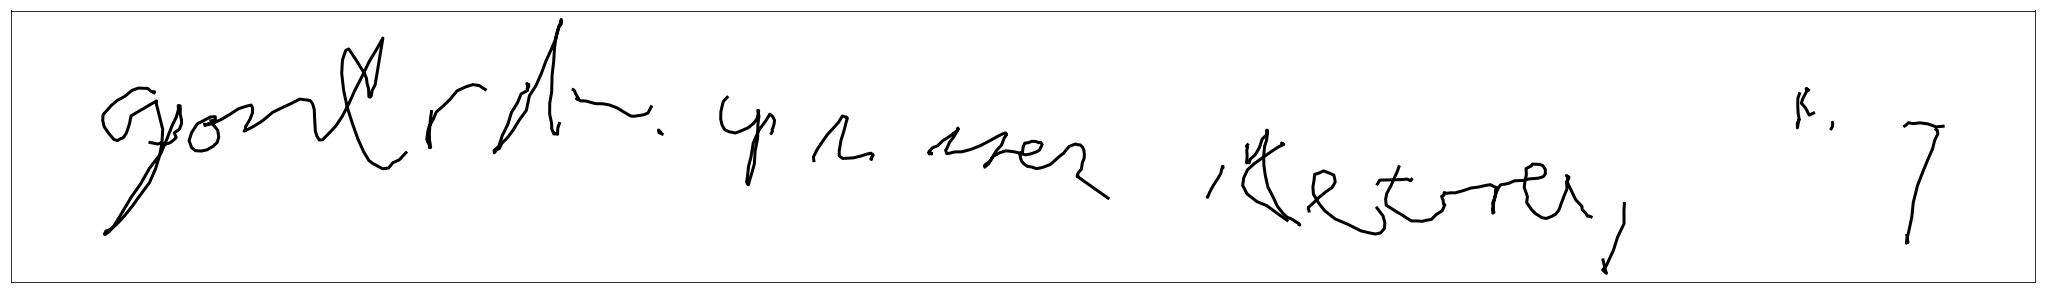

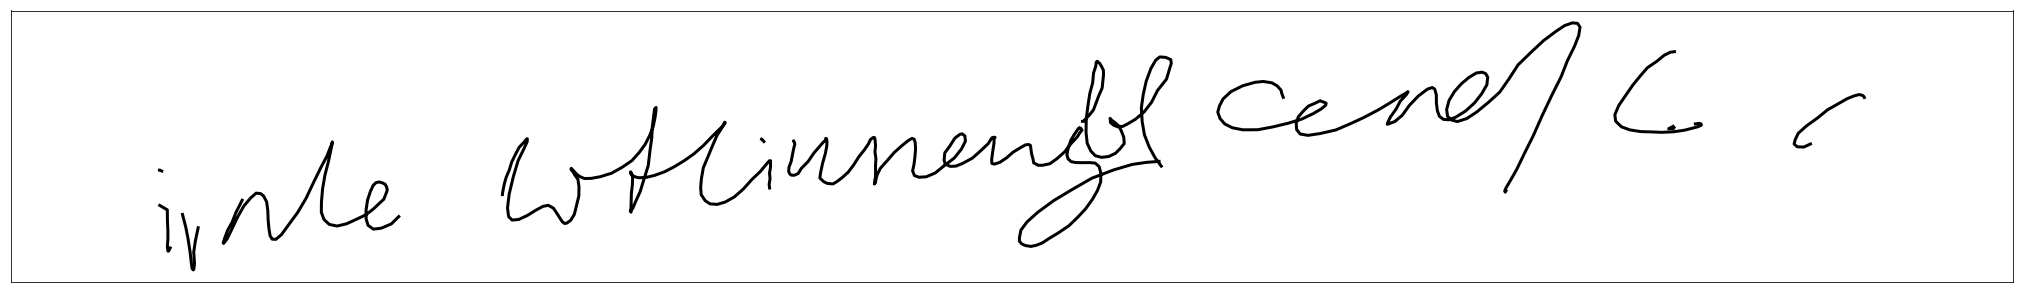

In [5]:
for _ in range(10):
    seed = random.randint(1, int(1e+6))
    stroke = prediction_model.sample(random_seed=seed)
    plot_stroke(stroke)
    plt.show()

### Conditional generation:

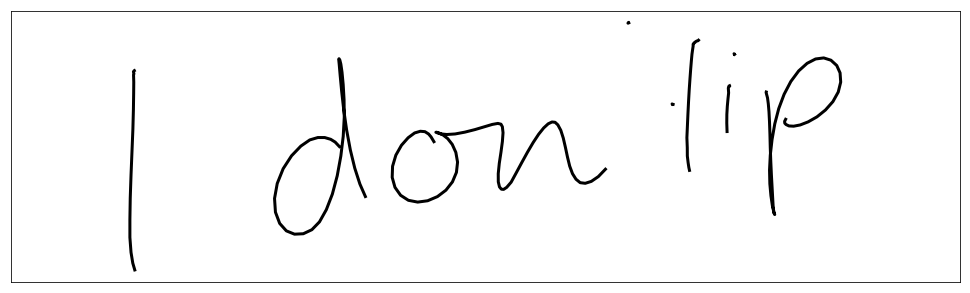

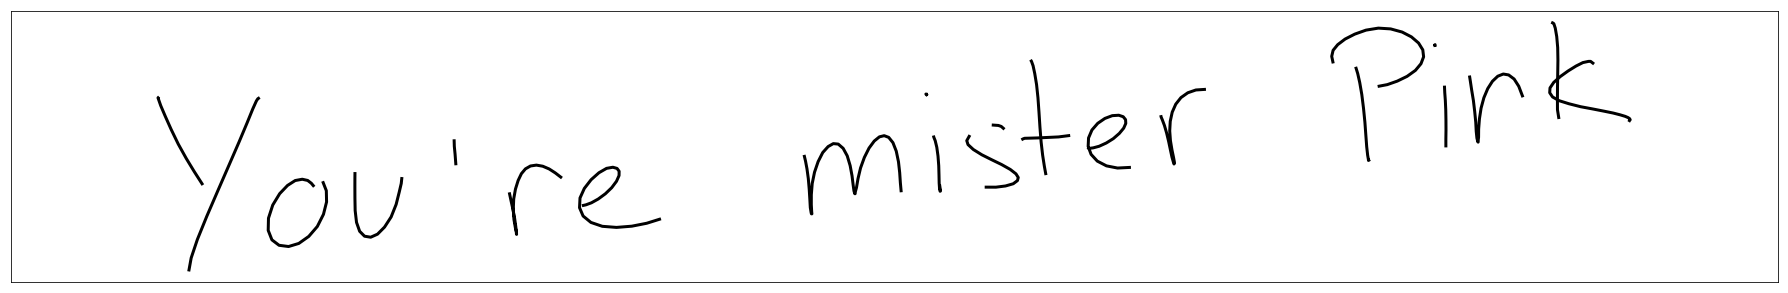

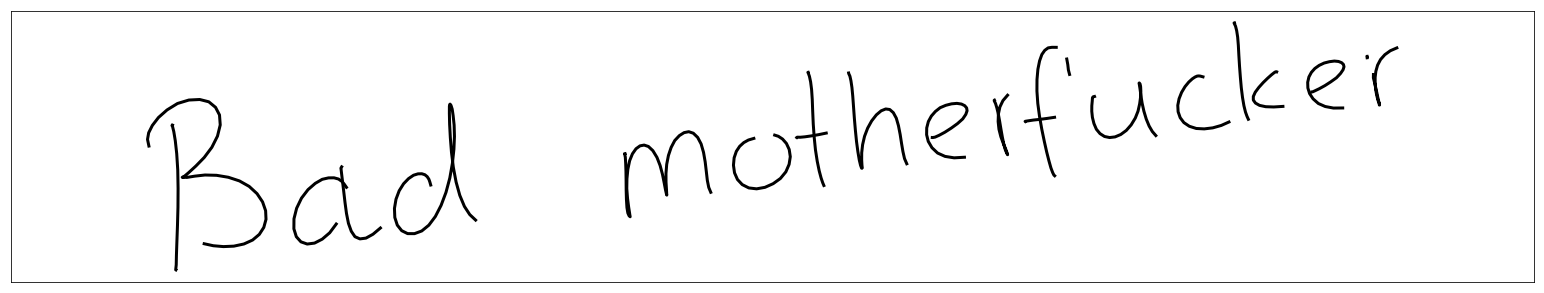

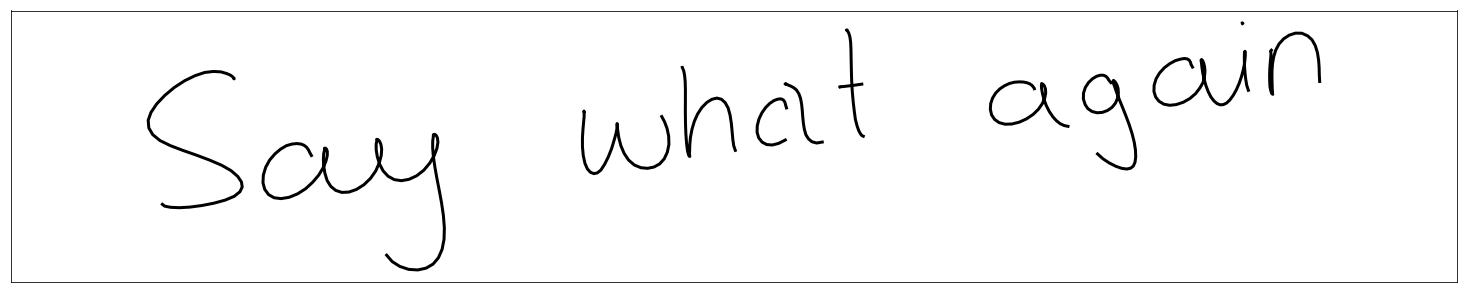

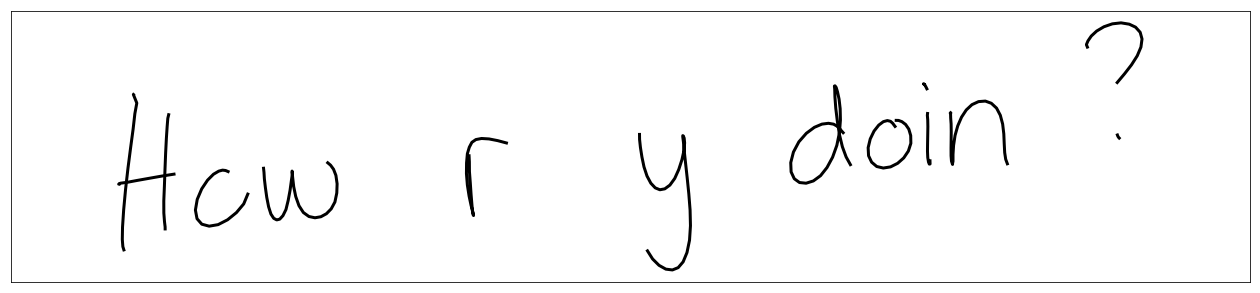

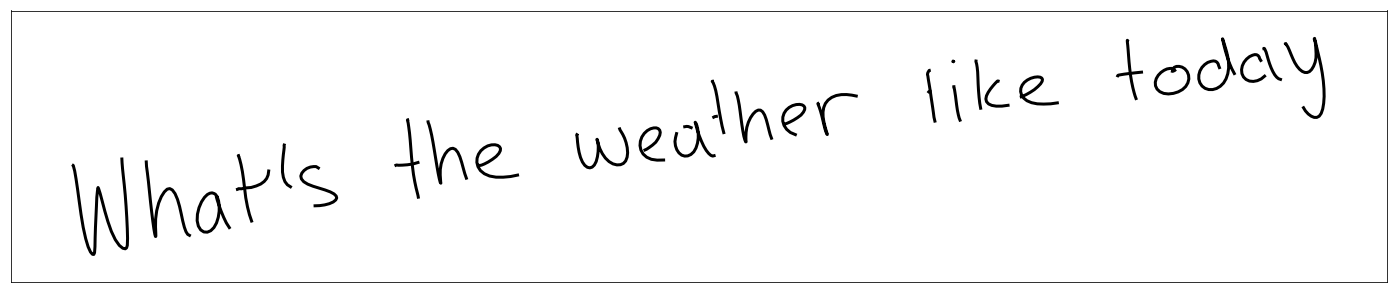

In [6]:
texts = ["I don' tip", "You're mister Pink", "Bad motherfucker", "Say what again",
         "How r y doin?", "What's the weather like today?"]
for text in texts:
    seed = random.randint(1, int(1e+6))
    stroke = synthesis_model.generate_conditionally(text=text, bias=10, random_seed=seed)
    plot_stroke(stroke)
    plt.show()

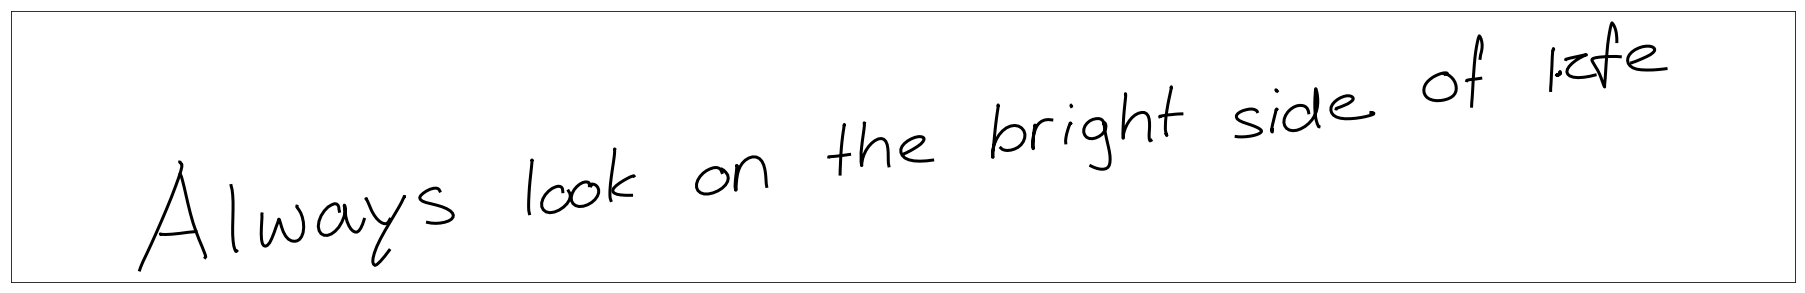

In [13]:
stroke = synthesis_model.generate_conditionally(text="Always look on the bright side of life  ", bias=5, random_seed=1)
plot_stroke(stroke)

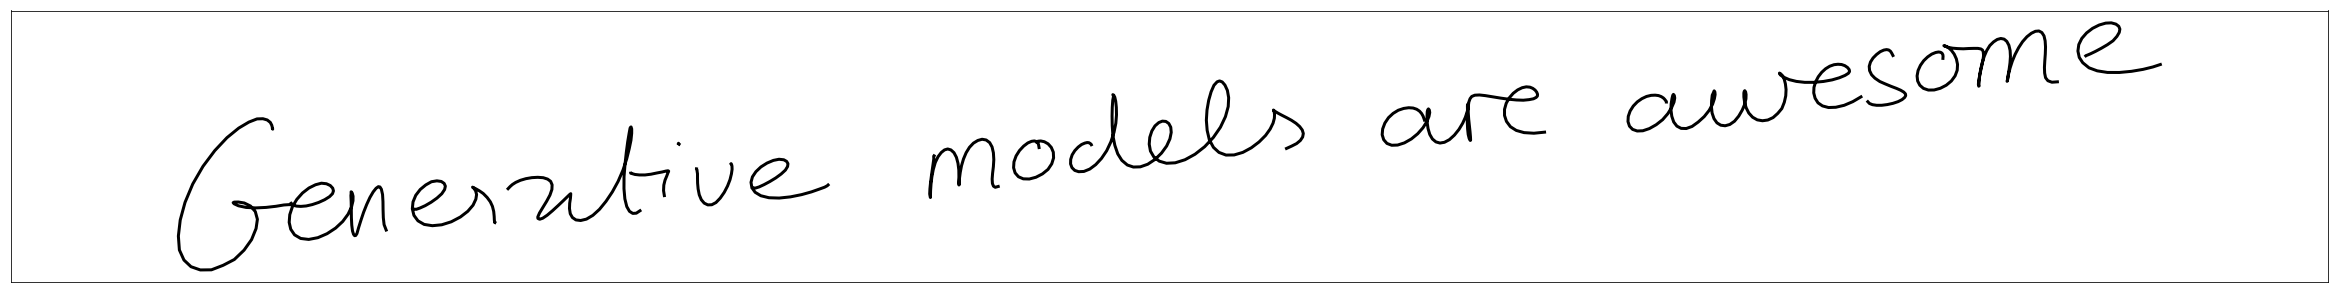

In [8]:
stroke = synthesis_model.generate_conditionally(text="Generative models are awesome", bias=5, random_seed=13)
plot_stroke(stroke)

$\kappa_{t} = \kappa_{t-1} + \alpha * \exp(\hat \kappa_{t})$